**Group:** Light <br>
**Full Name:** Nguyen Nguyen Ha Nhan <br>
**Student ID:** s3687637 <br>

# $\color{royalblue}{\text{PREDICTION OF TEMPERATURE THROUGH A WEATHER DATASET}}$

## $\color{mediumblue}{\text{Introduction}}$ <a name = "Introduction"></a>
Through what we learned from the course MATH2350, we come up with a small project about values prediction with a weather dataset gathered from the open source Kaggle at https://www.kaggle.com/zakriarehman/weather-data-for-linear-regression <cite data-site="weather">(Rehman, 2020)</cite>. For supporting the prediction progress, we use the `Statsmodels` and `Patsy` modules with Pyhon version >= 3.6.<br>
The report has a greater assistance from the sample course project provided in the course MATH2350 <cite data-site="sample">(Regression Case Study, 2019)</cite>.<br><br>
This report is organized as follows:
- [Goals and Objectives](#Goals): section provides the purpose of this project
- [Source and Description](#Overview): section introduces the source of dataset and describes concisely every features in the dataset.
- [Data Preparation](#Preparation): section covers data cleaning and transformation steps before exploring. 
- [Data Exploration](#Exploration): section explores dataset features and their inter-relationships.
- [Statistical Modeling and Performance Evaluation](#Evaluation): section first fits a full multiple linear regression model and performs diagnostic checks. Next, we perform backwards variable selection using p-values to obtain a reduced model, after which we perform another set of diagnostic checks on the reduced model.
- [Conclusion](#Conclusion): section provides a summary of our work and presents our findings.

## $\color{mediumblue}{\text{I. Goals and Objectives}}$ <a name = "Goals"></a>
The objective is to predict the temperature of the weather within an acceptable margin of error using multiple linear regression. Moreover, we also analyse the linear relationship between temperature and other indicators of the weather.

## $\color{mediumblue}{\text{II. Source and Description}}$ <a name = "Overview"></a>
The dataset named `weather.csv` was provided by Zakria Rehman on Kaggle with a general information of variables indicated in the row of the file. In specific, it contains 10,000 observations along with one response variable and other 7 descriptive (independent) variables and 1 dependent variable supporting for the prediction.<br><br>
The list below summarizes the description of attributes gathered from the `weather.csv` file:<br><br>
**Table 1: Details of attributes**

| Name || Data type || Unit || Description |
| :- || :-: || :- || :- |
| **Temperature_c** || numerical || degree Celsius (°C) || Temperature |
| **Humidity** || numerical || unknown || Humidity |
| **Wind_Speed_kmh** || numerical || kilometers per hour (km/h) || Wind speed |
| **Wind_Bearing_degrees** || numerical || degrees || Wind direction |
| **Visibility_km** || numerical || kilometers (km) || Measurement of distance where an object or light can be clearly recognized |
| **Pressure_millibars** || numerical || millibars (mb) || Atmostpheric pressure |
| **Rain** || categorical || binary || Rain or not (1 or 0) |
| **Description** || categorical || unknown || Weather condition (Cold, Normal, Warm) |

According to the project objective, we identify `Temperature` as our response variable. Since the target is defined as numerical; hence, our project is on a linear regression problem. Besides, we can identify that `Description` can be seen as a dependent categorical variable since it relies on what degree the temperature is.

## $\color{mediumblue}{\text{III. Data Preparation}}$ <a name = "Preparation"></a>
### $\color{mediumblue}{\text{1. Preliminaries}}$
First and foremost, we start the project by importing all the necessary modules which will support for the prediction process and results.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries to handle data and table
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# To see all the columns
pd.set_option('display.max_columns', None)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import modelling algorithm libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

The next step is to read in the `weather.csv` dataset after downloading it from the link mentioned in the introduction. Although  the file has already had the variable names on the first row, we are desirable to obtain the records with some better column names where they will not contains the unit of each variable. Hence, it is necessary to specify them clearly before processing the data and exclude the row of the columns names in the file.<br>
Besides, in order to get the number of rows and columns which built up the shape of the dataset, we use the function `shape()`. This also helps us to confirm that the dataset has been loaded correctly.

In [2]:
# Specifying the new attribute names
featureNames = ['Temperature',
                  'Humidity',
                  'Wind_Speed',
                  'Wind_Bearing',
                  'Visibility',
                  'Pressure',
                  'Rain',
                  'Description',]

# Read in dataset
data = pd.read_csv("weather.csv", names = featureNames, header = None, skiprows = 1)
print(f"- The shape of the dataset is {data.shape}, where {data.shape[0]} and {data.shape[1]} is the number of rows and columns, respectively.")

- The shape of the dataset is (10000, 8), where 10000 and 8 is the number of rows and columns, respectively.


In [3]:
# Display the table of 10 random rows
display(HTML('<b>Table 2: The first 10 observations from the dataset</b>'))
data.head().round(3)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain,Description
0,-0.556,0.92,11.270,130,8.050,1021.60,0,Cold
1,21.111,0.73,20.930,330,16.100,1017.00,1,Warm
2,16.600,0.97,5.973,193,14.909,1013.99,1,Normal
3,1.600,0.82,3.220,300,16.100,1031.59,1,Cold
4,2.194,0.60,10.884,116,9.982,1020.88,1,Cold


In [4]:
# Display the table of 10 random rows
display(HTML('<b>Table 3: The last 10 observations from the dataset</b>'))
data.tail().round(3)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain,Description
9995,10.022,0.95,10.240,20,4.009,1007.41,1,Normal
9996,8.633,0.64,11.045,80,9.982,1031.33,1,Normal
9997,5.978,0.93,11.045,269,14.909,1014.21,1,Normal
9998,9.789,0.78,8.179,231,7.825,1005.02,1,Normal
9999,11.139,0.79,14.248,131,10.256,1010.14,1,Normal


### $\color{mediumblue}{\text{2. Data Checking}}$
After having the dataset read in, we need to re-confirm the data types of features whether they match the descriptions outlined in the documentation or not using `dtypes` method in the `Pandas` module.

In [5]:
print(f"- Data types of variables:")
print(data.dtypes)

- Data types of variables:
Temperature     float64
Humidity        float64
Wind_Speed      float64
Wind_Bearing      int64
Visibility      float64
Pressure        float64
Rain              int64
Description      object
dtype: object


With `Pandas` module, we can see that string type appears with the data type `object` and usually this would represent for categorical. In this case, we receive 1 identified categorical variables matching with the information which we have obtained in the second section. Apart from that, there are some other variables with the type `float64`. Based on this point, it is easy to determine that these are variables are numeric; hence, it still follows the information that we have got. Besides that, we have other 2 variables in `int64` data type which also indicates as integer. However, we notice that one of them does not actually belong to the numerical variable group and that is `Rain`. As an explanation, it would be more accurate if we treat `Rain` as categorical instead of numerical variable since we have it defined with only 2 logic values `0` and `1` representing for either having rain or not. At this phase, we have only 6 numerical variables and 2 categorical variables in total. <br>
After that, we scan through every records in case there is any missing values exist. If that circumstance occurs, we have to drop the corresponding rows where at least one missing value was recorded.

In [6]:
print(f"- Number of missing values for each feature:")
print(data.isnull().sum())

- Number of missing values for each feature:
Temperature     0
Humidity        0
Wind_Speed      0
Wind_Bearing    0
Visibility      0
Pressure        0
Rain            0
Description     0
dtype: int64


For this dataset, we fortunately observe that there is no columns containing any missing values. Hence, we can move forward to the next step for analyzing the details of numerical ad categorical features separately.

### $\color{mediumblue}{\text{3. Data Statistics}}$
Subsequently, we analyse 2 groups of data separately using its corresponding data type and have the data processed in case there is any error concernment occurs.
#### $\color{mediumblue}{\text{a. Numerical Variables}}$

In [7]:
# 'int64' defines numerical variables
display(HTML('<b>Table 4: Summary statistics of numerical variables</b>'))
data.describe(include = np.number).round(3)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain
count,10000.000,10000.000,10000.000,10000.00,10000.000,10000.000,10000.000
mean,11.857,0.735,10.814,185.98,10.373,1004.896,0.891
std,9.512,0.195,6.973,107.47,4.179,109.617,0.311
min,-21.822,0.000,0.000,0.00,0.000,0.000,0.000
25%,4.656,0.600,5.748,112.00,8.287,1011.890,1.000
50%,11.561,0.780,9.934,179.00,10.046,1016.500,1.000
75%,18.822,0.900,14.104,290.00,14.876,1021.110,1.000
max,38.839,1.000,53.243,359.00,16.100,1045.380,1.000


As mentioned in the previous section, the feature `Rain` does not belong to the numerical group. Hence, we can ignore the details of this variable in Table 4 above. Subsequently, we will have a closer look into our target `Temperature` with a function to detect outliers existed in the dataset following the values of `Temperature`. This function can be called whenever we are in need of detecting outliers within this project.

In [8]:
# A function to detect outliers
def outlier_detect (data_variable):
    Q1_val = data_variable.quantile(0.25)
    Q3_val = data_variable.quantile(0.75)
    IQR = Q3_val - Q1_val # Compute the interquartile range (IQR)

    # Compute max upper whisker reach and max lower whisker reach.
    max_whisker = Q3_val + 1.5*IQR
    min_whisker = Q1_val - 1.5*IQR
    
    outliers = data[(data_variable < min_whisker) | (data_variable > max_whisker)]
    if outliers.shape[0] == 0:
        print(f" - No outliers exist")
    else:
        return outliers

# Detect outliers based on "Temperature" variable
print('- Number of outliers exist:', outlier_detect(data['Temperature']).shape[0])
display(HTML('<b>Table 5: List of Outliers Detected</b>'))
outlier_detect(data['Temperature'])

- Number of outliers exist: 4


,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain,Description
3655,-21.822222,0.80,3.0751,323,1.3685,1033.66,0,Cold
4181,-17.294444,0.91,3.6386,161,5.2003,1035.90,0,Cold
4526,-17.777778,0.00,3.2200,190,0.8050,1035.00,0,Cold
7892,-20.277778,0.79,5.6672,158,1.8032,1033.53,0,Cold


According to the details of these outliers, it is easy to see that they indicates the cold weather with the temperature decrease tremendously. These outliers also tends to be scattered among the dataset. While the dataset is large and the data tends to be accurate, we can ignore the occurence of these outliers as it would have much effect on the result, either good or bad. Furthermore, we are aiming to predict the temperature of the weather; hence, we can consider to keep these rows and continue with our current work.

#### $\color{mediumblue}{\text{b. Categorical Variables}}$
As a reminder, we have 2 categorical variables `Rain` and `Description`. Since we have made clear  the information about `Rain` in the previous part, we will continue to process the other variable `Description` in this section. 

In [9]:
# A function to print all values of categorical columns
categorical = data.columns[data.dtypes == object].tolist()
def printCategorical():
    for col in categorical:
        print('- Unique values for ' + col)
        print(data[col].unique())
        print('')
printCategorical()

# 'object' defines categorical variables
data.describe(include = np.object)

- Unique values for Description
['Cold' 'Warm' 'Normal']



,Description
count,10000
unique,3
top,Normal
freq,4992


For this categorical feature, we have its 3 unique values and all of them are self-explained and clean. Hence, we do not need to process the data or its format further to work successfully with `Patsy` module. The only a task is to have this descriptive feature encoded to become numeric with one-hot-encoding method. However, we decide to explore the data first and starting with the encoding later before processing the regression.

## $\color{mediumblue}{\text{IV. Data Exploration}}$ <a name = "Exploration"></a>
After some steps for data processing, the dataset can be considered 'clean' and ready for us to start the visualization and statistical modeling. 

### $\color{mediumblue}{\text{1. Univariate Visualization}}$
Firstly, let's have a look at a bar chart representing the quantity of different weather statuses occur in the dataset. The reason for us to check on `Description` feature is that it shows us how the temperature is detemined in term of 3 levels. In other words, we can think of the `Description` as a categorical version of `Temperature`.

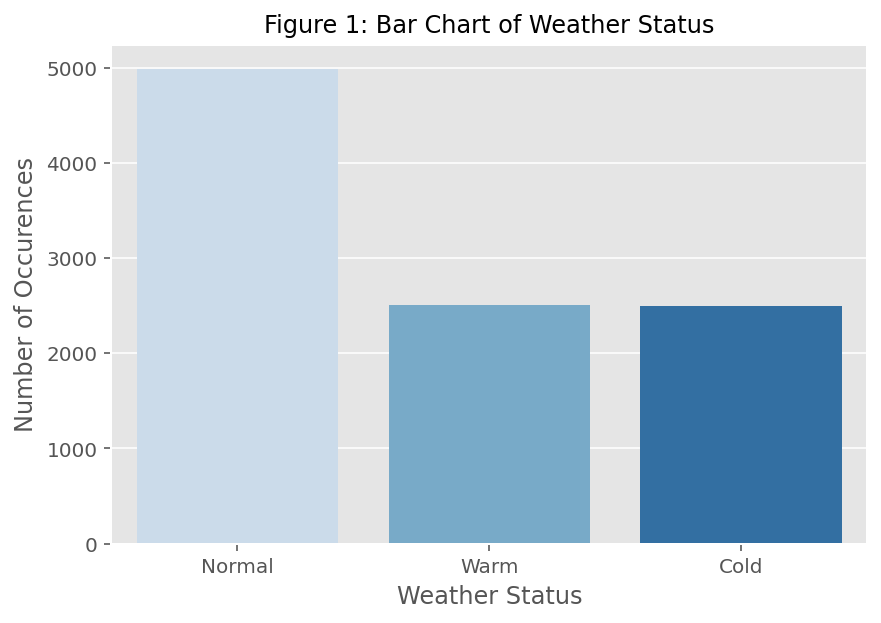

In [10]:
# Indicate variables to store frequency
count = data['Description'].value_counts()
description_barchart = sns.barplot(count.index, count.values, palette = ("Blues"))

# Format the layout and 2 axis
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Weather Status', fontsize = 12)
plt.xlabel('Weather Status')
plt.ylabel('Number of Occurences')
plt.show(description_barchart)

Subsequently, we have a boxplot for representing the distribution of temperature values. This plot will help us to identify if there is any remarkable outliers exist which could affect the regression. Besides, we also  check for the detailed distribution of its observations with a histogram as shown in Figure 3. As a result, we easily recognize that this variable is approximately skew normal distribution

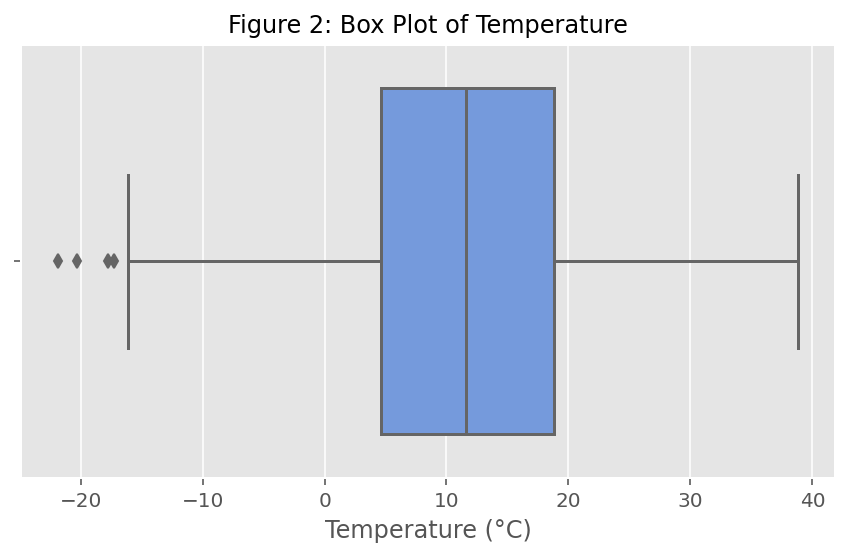

In [11]:
# Get a boxplot of Temperature
temperature_boxplot = sns.boxplot(data['Temperature'], color = "cornflowerblue")
plt.title('Figure 2: Box Plot of Temperature', fontsize = 12)
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show(temperature_boxplot);

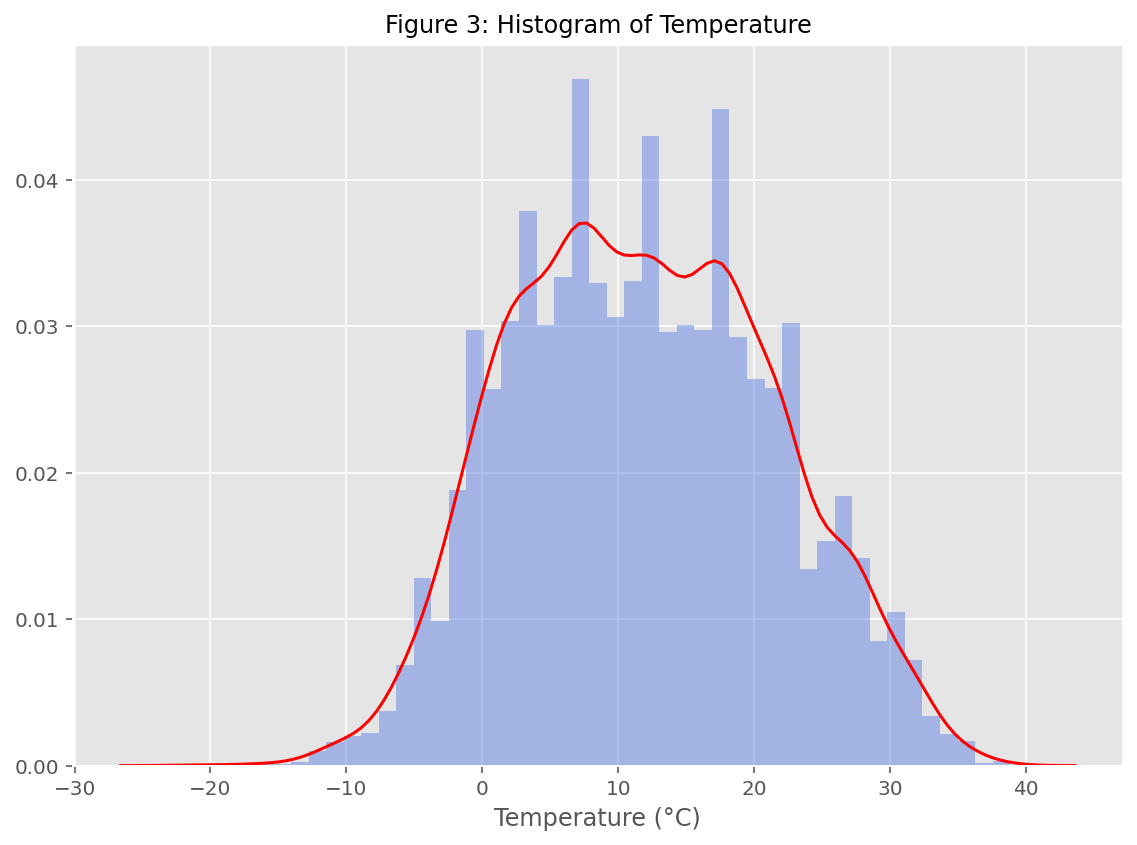

In [12]:
# Get a histogram of Temperature with kernel density estimate
plt.figure(figsize = (8,6))
temperature_histogram = sns.distplot(data['Temperature'], kde = True, color = "red", hist_kws = dict(color = "royalblue"))
plt.title('Figure 3: Histogram of Temperature', fontsize = 12)
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show(temperature_histogram);

### $\color{mediumblue}{\text{2. Multivariate Visualization}}$
In order to establish the relationship among numerical variables, we generate a table which indicates the statistics of correlations for these variables as follows:

In [13]:
display(HTML('<b>Table 6: Correlations of numerical variables</b>'))
data.corr()

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain
Temperature,1.000000,-0.628855,0.009768,0.031397,0.389466,0.013739,0.557795
Humidity,-0.628855,1.000000,-0.222959,-0.007522,-0.375676,-0.011228,-0.225116
Wind_Speed,0.009768,-0.222959,1.000000,0.108276,0.100525,-0.051067,0.067543
Wind_Bearing,0.031397,-0.007522,0.108276,1.000000,0.052080,-0.005597,0.048564
Visibility,0.389466,-0.375676,0.100525,0.052080,1.000000,0.066663,0.302374
Pressure,0.013739,-0.011228,-0.051067,-0.005597,0.066663,1.000000,0.004147
Rain,0.557795,-0.225116,0.067543,0.048564,0.302374,0.004147,1.000000


According to the figure above, we can easily detemine that `Humidity` is the only feature which has a tremendous inverse relationship with our target feature `Temperature` since the correlation value between them is negative. It can be explained as follows. In reality, humidity has already had a strong attachment to temperature. In summer months, when the humidity of air decreases, the temperature will increase. Vice versa, the temperature will decrease when the humidity increases, specially in winter months. As such, it is accurate when the `Humidity` feature are significantly provided regarding to the effect on `Temperature`.
#### $\color{mediumblue}{\text{a. Scatterplot of Numerical Features and PRP}}$
Following Table 6, we generate a scatterplot in order to have a closer look into how the relationship between `Temperature` and `Humidity` was built. As a result, it is easy for us to observe a clear correlation between these numeric variables, which was also indicated through the correlation value in Table 6.

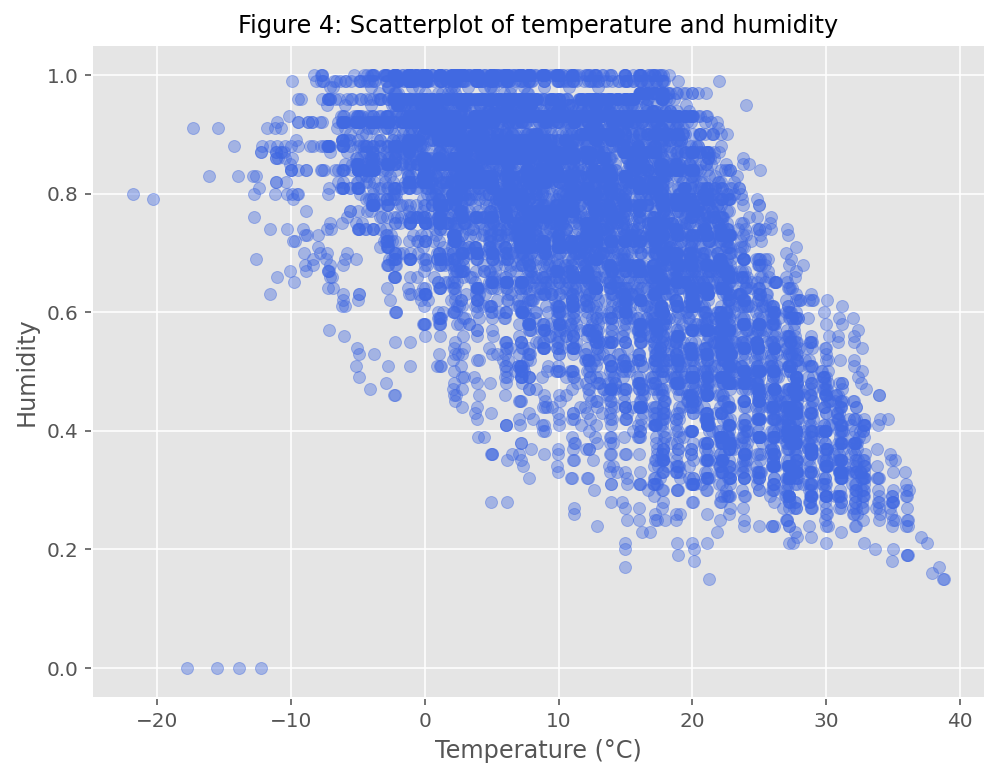

In [14]:
# Get scatterplots of temperature versus humidity
plt.figure(figsize = (8,6))
plt.scatter(data['Temperature'], data['Humidity'], alpha = 0.4, color = "royalblue")
plt.title('Figure 4: Scatterplot of temperature and humidity', fontsize = 12)
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')
plt.show();

The illustration in Figure 4 has proved us with a clear and close-knit relationship between temperature and humidity in the air. However, there is occurence of some outliers which represents for the exception of the weather in reality. Explaining for this, there will be a few days when the weather is warm, although the temperature is high, the humidity also lies at high level. At that time, it will cause sweltering and annoying to human. So does the weather when it is cold and the humidity still remains as low level, people will have to deal with the dryness. As such, it is easy to understand why these outliers were recorded and it actually could not have much impact on our regression.

#### $\color{mediumblue}{\text{b. Categorical Attributes by Temperature}}$
With the exploration on categorical variables, we will have an insight to the relationship between out target `Temperature` and other 2 descriptive variables `Rain` as well as `Description`.

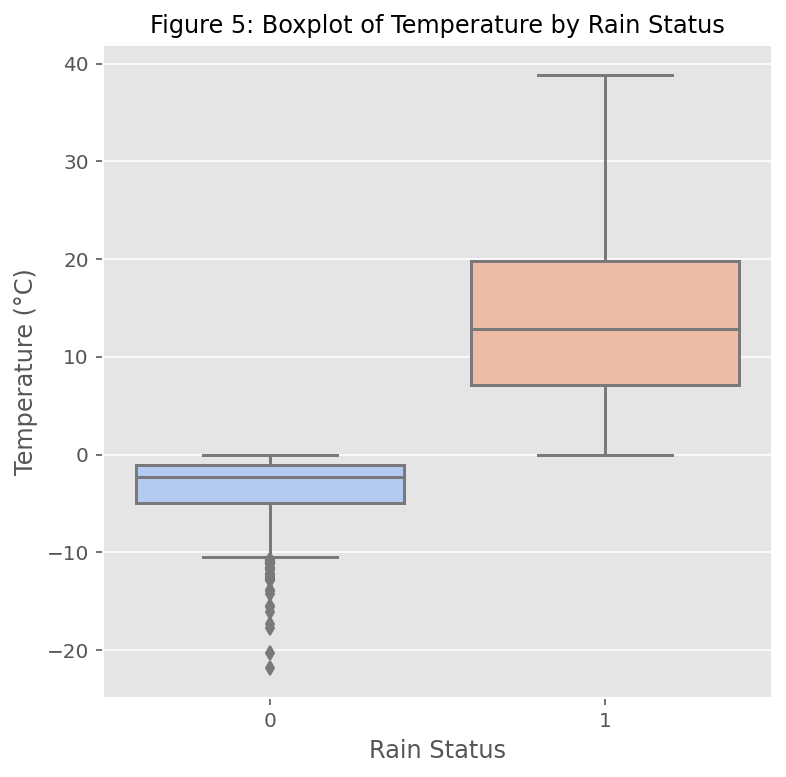

In [15]:
# Box plot for Categorical columns
plt.figure(figsize = (6,6))
sns.boxplot(data['Rain'], data['Temperature'], palette = "coolwarm")
plt.title('Figure 5: Boxplot of Temperature by Rain Status', fontsize = 12)
plt.xlabel('Rain Status', fontsize = 12)
plt.ylabel('Temperature (°C)', fontsize = 12)
plt.show()

Starting with the status of rain, `0` and `1` indicate the status `no rain` and `rain`, respectively. In addition, it is clear these status have a trememdous different distribution. While logic `1` is normally distributed among the `Temperature` feature, logic `0` tends to be left-skewed distribution (negative skewness). The whiskers determine that rain could not occur when the temperature is below 0°C.<br>
With the next boxplot, we determine the distribution of temperrature in term of the weather status `Description`. Since we have not transformed this feature yet, it is better for us to view by categorical as follows:

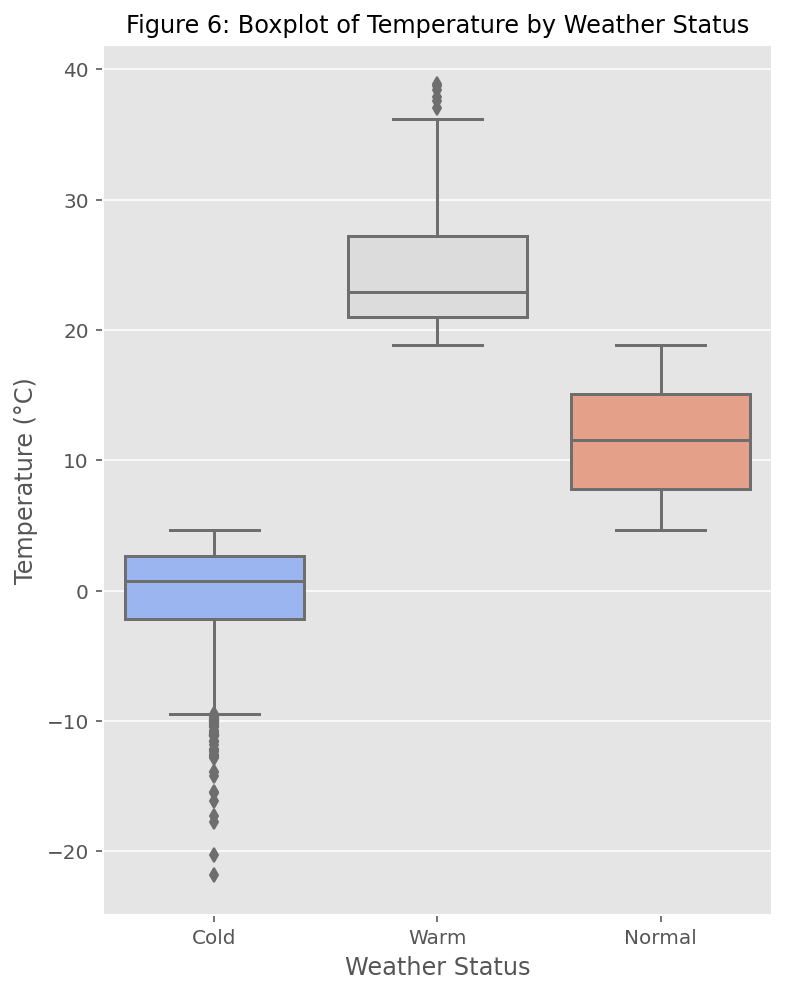

In [16]:
# Box plot for Description columns
plt.figure(figsize = (6,8))
sns.boxplot(data['Description'], data['Temperature'], palette = "coolwarm")
plt.title('Figure 6: Boxplot of Temperature by Weather Status', fontsize = 12)
plt.xlabel('Weather Status', fontsize = 12)
plt.ylabel('Temperature (°C)', fontsize = 12)
plt.show()

As mentioned in the introduction, `Description` is indicated as a dependent feature, but we did not have a strong proof for it until this phase. According to the Figure 6, there is a clear pattern for the weather statuses when they normally distributed as same as in reality. The temperature below -5°C is shown as cold, greater than 20°C is warm and between these milestones is normal.

#### $\color{mediumblue}{\text{c. Combination of remarkable numerical features versus categorical features}}$
Looking closer into another relationship of `Temperature` with `Wind_Speed` in term of rain status, we can identify an overall pattern with no outliers. In that pattern, the speed of wind tends to be slower under 40 km/h when the temperature falls behind 0°C and there is no rain at that time. Apart from that, the wind speed values steadily spreads from the lowest (0 km/h) to the highest (over 50 km/h). This is a right-skewed distribution of `Wind_Speed` in term of `Temperature` and rain also occurs at that time.

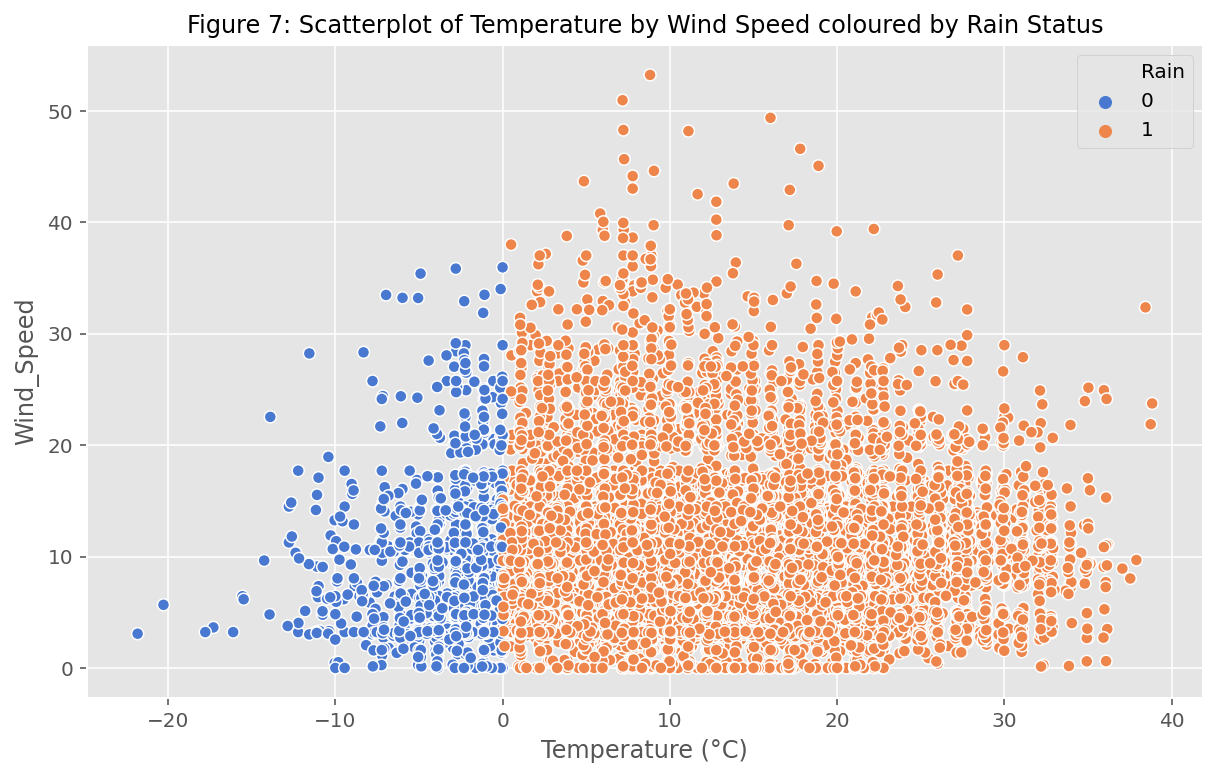

In [17]:
# Creating a scatterplot
plt.figure(figsize = (10,6))
sns.scatterplot(data['Temperature'], data['Wind_Speed'], hue = data['Rain'], palette = "muted")
plt.title('Figure 7: Scatterplot of Temperature by Wind Speed coloured by Rain Status', fontsize = 12);
plt.xlabel('Temperature (°C)')
plt.legend(loc = 'upper right')
plt.show();

## $\color{mediumblue}{\text{V. Statistical Modeling and Performance Evaluation}}$ <a name = "Evaluation"></a>
In this section, we will implement the multiple linear regression with the assistance of statistical modeling. We also get some helps with the Python codes from the sample course project provided through the course MATH2350 <cite data-site="sample">(Regression Case Study, 2019)</cite>.<br>
Before coming to the regression process with full model, we have to encode categorical features using one-hot-encoding, which we have mentioned. Since this categorical feature contains more than 2 levels, we can implement encoding method regularly using a function `get_dummies()` supported by `Pandas`. With this function, in case there is any numerical features in the dataset, it will ignore all of them and only work with the categorical ones.

In [18]:
description = pd.get_dummies(data['Description'])
description.head()

,Cold,Normal,Warm
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


Having obtained the dummy values of `Description` into another dataframe, we will combine it with our initial dataframe by using `concat()` function. Afterwards, we remove the column of `Description` feature from `data` as follows:

In [19]:
data = pd.concat([data, description], axis = 1)
data.head().round(3)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain,Description,Cold,Normal,Warm
0,-0.556,0.92,11.270,130,8.050,1021.60,0,Cold,1,0,0
1,21.111,0.73,20.930,330,16.100,1017.00,1,Warm,0,0,1
2,16.600,0.97,5.973,193,14.909,1013.99,1,Normal,0,1,0
3,1.600,0.82,3.220,300,16.100,1031.59,1,Cold,1,0,0
4,2.194,0.60,10.884,116,9.982,1020.88,1,Cold,1,0,0


In [20]:
data.drop(['Description'], axis = 1, inplace = True)
data.head().round(3)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Rain,Cold,Normal,Warm
0,-0.556,0.92,11.270,130,8.050,1021.60,0,1,0,0
1,21.111,0.73,20.930,330,16.100,1017.00,1,0,0,1
2,16.600,0.97,5.973,193,14.909,1013.99,1,0,1,0
3,1.600,0.82,3.220,300,16.100,1031.59,1,1,0,0
4,2.194,0.60,10.884,116,9.982,1020.88,1,1,0,0


Processed the one-hot-encoding, we receive all 10 numerical features with 4 last features `Rain`,`Cold`, `Normal` and `Warm` were transformed from categorical.
### $\color{mediumblue}{\text{1. Full Model}}$
We start with a full model, which uses all the avaliable features  to predict the temperature values fitting a multiple linear regression. First and formost, we construct a regression formula where we can add all the features using some statements as follows <cite data-site="sample">(Regression Case Study, 2019)</cite>:

In [21]:
# Implement a linear formula
formula_indep_vars = ' + '.join(data.drop(columns = 'Temperature').columns)
formula = 'Temperature ~ ' + formula_indep_vars
print('Formula for independent variables: ', formula)

Formula for independent variables:  Temperature ~ Humidity + Wind_Speed + Wind_Bearing + Visibility + Pressure + Rain + Cold + Normal + Warm


After defining the statistical model formula as a Python string, we fit an OLS Regression (Ordinary Least Square) model to our data, which has been encoded.

In [22]:
model_full = sm.formula.ols(formula = formula, data = data)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     7904.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:46:41   Log-Likelihood:                -26755.
No. Observations:               10000   AIC:                         5.353e+04
Df Residuals:                    9991   BIC:                         5.359e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6615      0.313     30.845   

With this full model, we obtain the value of an adjusted R-squared of 0.863. This indicates that 86.3% of the variance has been explained by the model. For the p-values, most of the variable are significant at a 5% level. In order to have a deeper insight, we can construct a new dataframe contains the values of the actual temperature versus predicted temperature along with the residuals for the full model as follows:

In [23]:
fullmodel_residual = pd.DataFrame({'Actual': data['Temperature'], 
                            'Predicted': model_full_fitted.fittedvalues, 
                            'Residual': model_full_fitted.resid})
display(HTML('<b>Table 7: Predicted versus Actual Temperature along with its Residual in Full Model</b>'))
fullmodel_residual.head(10).round(3)

,Actual,Predicted,Residual
0,-0.556,-3.887,3.331
1,21.111,22.355,-1.244
2,16.600,10.701,5.899
3,1.600,3.795,-2.195
4,2.194,4.421,-2.227
5,27.539,25.091,2.448
6,19.978,21.989,-2.012
7,11.111,10.806,0.305
8,8.406,12.213,-3.807
9,1.700,3.133,-1.433


Using this dataframe, we will generate some plots for observing the model further. First, let's have a look at the actual temperature values and its predicted values.

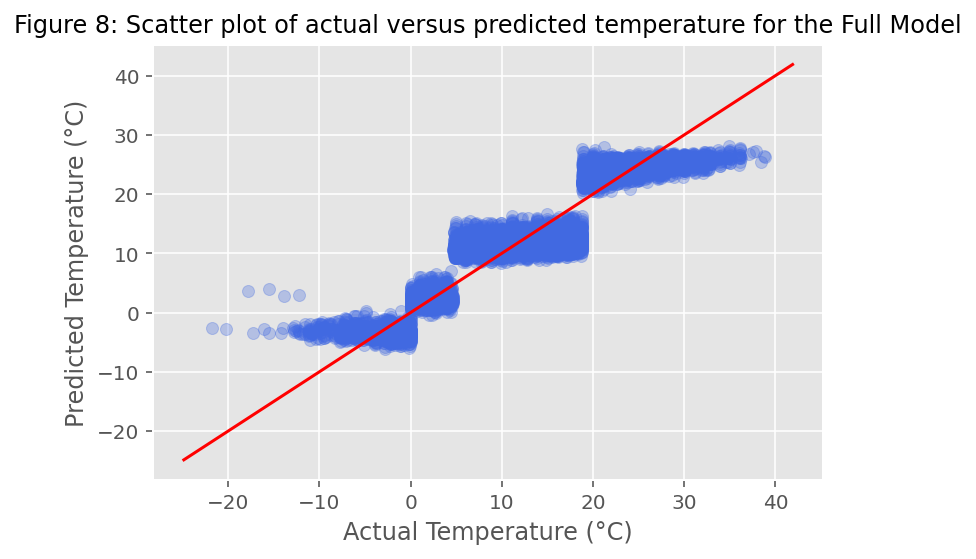

In [24]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin * slope + intercept, xmax * slope + intercept], **kargs)

# Creating scatterplot
plt.scatter(fullmodel_residual['Actual'], fullmodel_residual['Predicted'], alpha = 0.3, color = "royalblue");
plot_line(axis = plt.gca(), slope = 1, intercept = 0, c = "red");
plt.xlabel('Actual Temperature (°C)');
plt.ylabel('Predicted Temperature (°C)');
plt.title('Figure 8: Scatter plot of actual versus predicted temperature for the Full Model', fontsize = 12);
plt.show();

According to Figure 8 above, we can idenify that there are some points when the temperature is below -5°C, the corresponding predicted temperature cannot be produced with th same range of the actual one. The problem seems to be more serious when coming to the lower temperature values from below -15°C to -22°C since the prediction produces all the predicted values just around -1°C to -5°C. Furthermore, the problem also occurs for the values above 30°C as the prediction rounds all these value to be around 25°C to 29°C.<br>
Now, we are going to check through the diagnostics of the full model.
### $\color{mediumblue}{\text{2. Full Model Diagnostic Checks}}$
For this checking, we will identify through some plots generated from the dataframe in Table 7 in order to see if there are any violation occurences of the regression assumptions in the full model above.

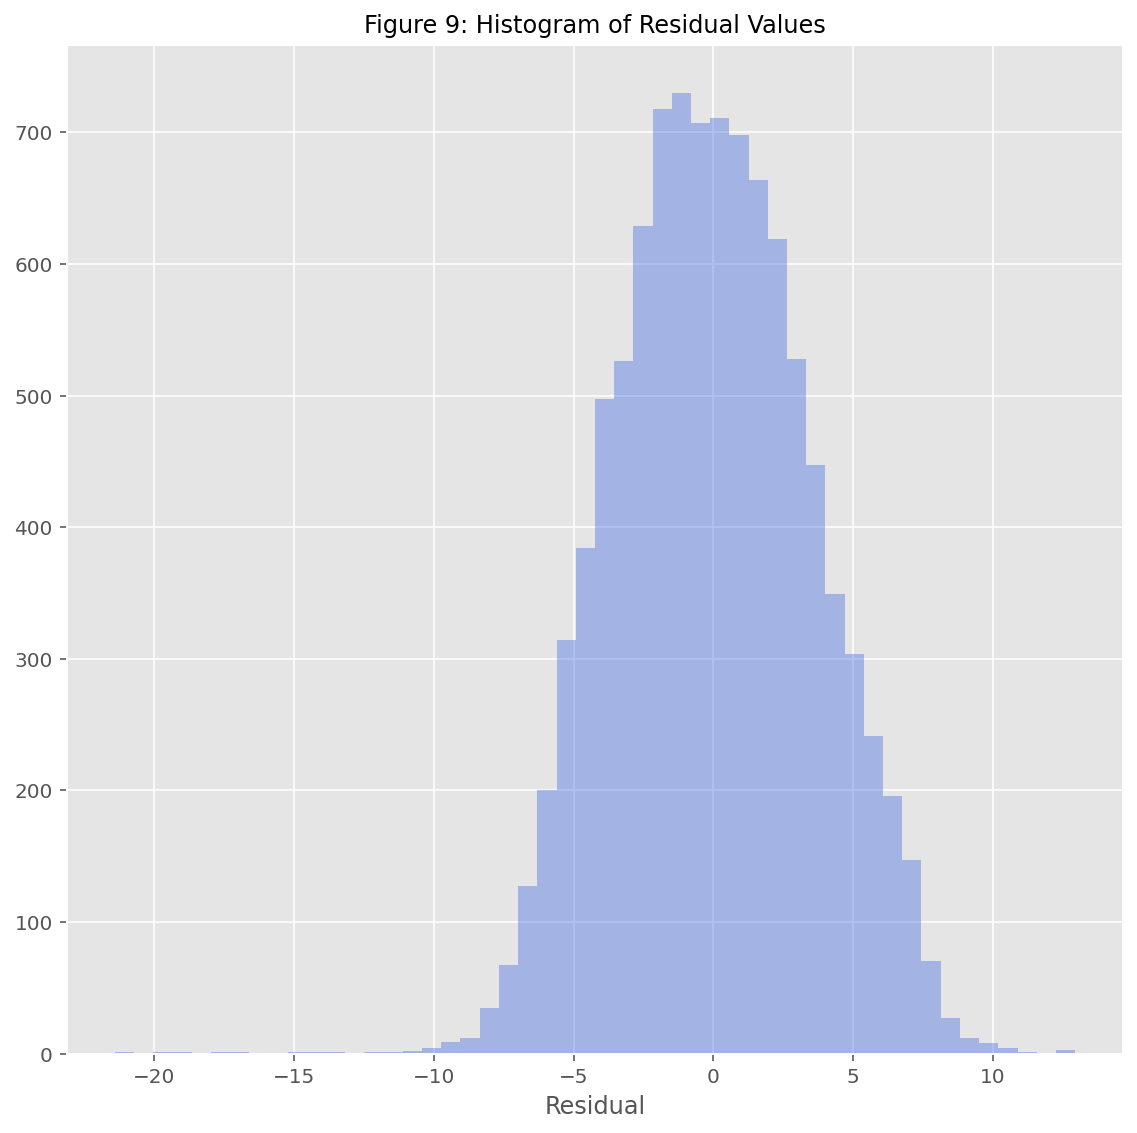

In [25]:
# Get a histogram of Temperature with kernel density estimate
plt.figure(figsize = (8,8))
residual_histogram = sns.distplot(fullmodel_residual['Residual'], kde = False, hist_kws = dict(color = "royalblue"))
plt.title('Figure 9: Histogram of Residual Values', fontsize = 12)
plt.xlabel('Residual')
plt.tight_layout()
plt.show(residual_histogram);

Regarding to the Figure 9 above, the distribution os slightly skewed left but symmetric. As such, the normality assumption of linear regression tends not to be the remarkable violation occur in our full model result. Subsequently, we come to the next histogram of the actual temperature comparing with the predicted one as follows:

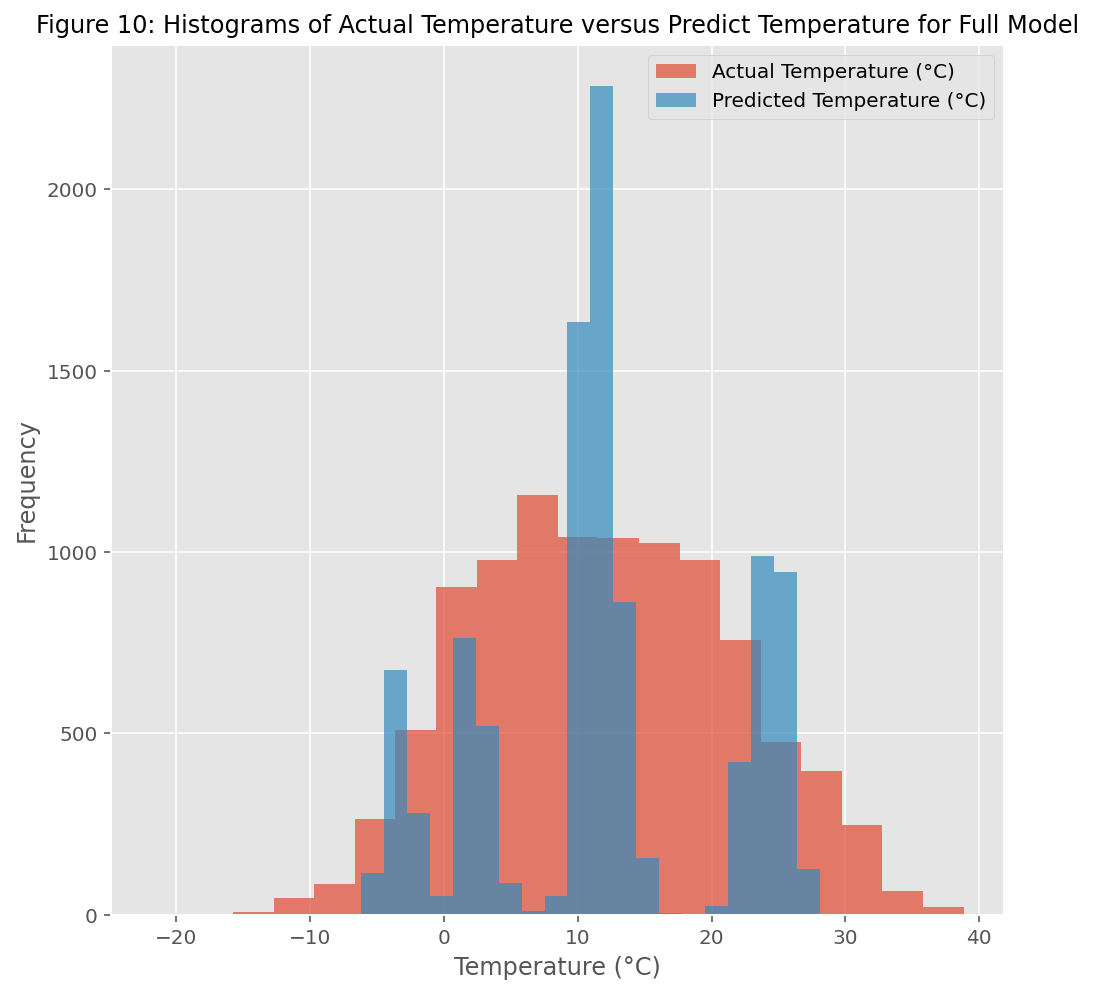

In [26]:
plt.figure(figsize = (8,8))
plt.hist(fullmodel_residual['Actual'], label = 'Actual Temperature (°C)', bins = 20, alpha = 0.7);
plt.hist(fullmodel_residual['Predicted'], label = 'Predicted Temperature (°C)', bins = 20, alpha = 0.7);
plt.xlabel('Temperature (°C)');
plt.ylabel('Frequency');
plt.title('Figure 10: Histograms of Actual Temperature versus Predict Temperature for Full Model', fontsize = 12);
plt.legend()
plt.show();

It is clear that the distributions of the predicted temperature values are extremely different from the actual ones. We will have to go further for each variable versus residual values in the next plots.

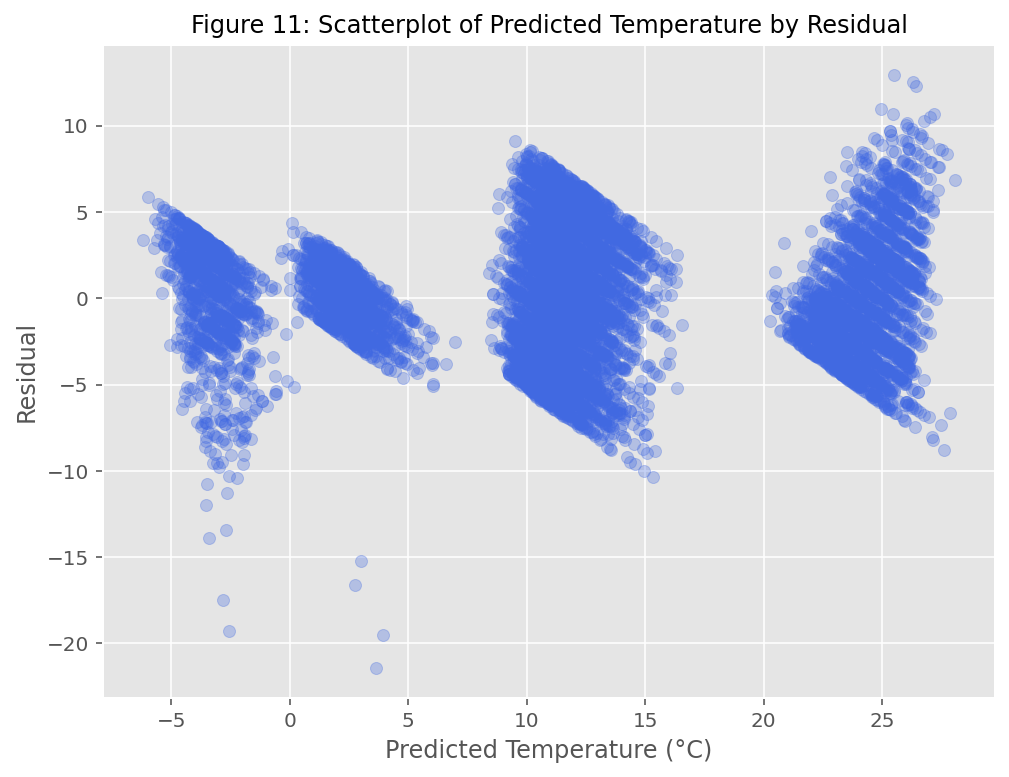

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(fullmodel_residual['Predicted'], fullmodel_residual['Residual'], alpha = 0.3, color = "royalblue")
plt.title('Figure 11: Scatterplot of Predicted Temperature by Residual', fontsize = 12);
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residual')
plt.show();

In this figure, it is clear that the temperature values are mostly predicted around 0 in scale of residual. This prevents the regression model to be more accurate in prediction with a high level values, in this case is the values much below 5°C and the ones much above 30°C. Hence, for this case, we can conclude that the constant variability assumption of linear regression has been violated.

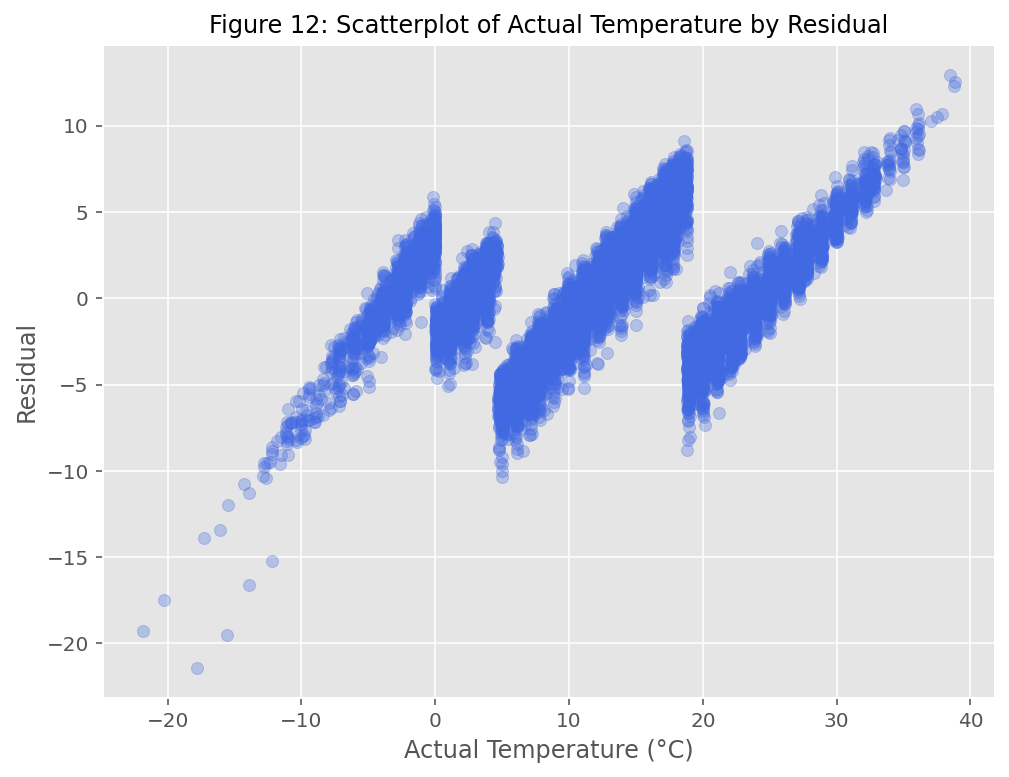

In [28]:
plt.figure(figsize = (8,6))
plt.scatter(fullmodel_residual['Actual'], fullmodel_residual['Residual'], alpha = 0.3, color = "royalblue")
plt.title('Figure 12: Scatterplot of Actual Temperature by Residual', fontsize = 12);
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Residual')
plt.show();

The problem is indicated much clearer through this figure since we can notice that the model underestimated the low temperature and high temperature. It saw those values as much less than the corresponding actual ones.

### $\color{mediumblue}{\text{3. Backwards Elimination}}$
In order to obtain a better model result, we implement backwards elemination for selecting the meaningful features for the prediction. Below is the Python code for this method obtained from the sample course project <cite data-site="sample">(Regression Case Study, 2019)</cite>.<br>

In [29]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Pressure" with p-value 0.955

***
                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     9035.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:46:42   Log-Likelihood:                -26755.
No. Observations:               10000   AIC:                         5.353e+04
Df Residuals:                    9992   BIC:                         5.358e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

With this reduced model, we also need to generate a new dataframe for storing the values of actual and predicted temperature along with its residuals using the code chunk below, which is provided by the sample course project <cite data-site="sample">(Regression Case Study, 2019)</cite>.<br>

In [30]:
residuals_reduced = pd.DataFrame({'Actual': data['Temperature'], 
                            'Predicted': model_full_fitted.fittedvalues, 
                            'Residual': model_full_fitted.resid})
display(HTML('<b>Table 8: Predicted versus Actual Temperature along with its Residual in Reduced Model</b>'))
residuals_reduced.head(10).round(3)

,Actual,Predicted,Residual
0,-0.556,-3.887,3.331
1,21.111,22.355,-1.244
2,16.600,10.701,5.899
3,1.600,3.795,-2.195
4,2.194,4.421,-2.227
5,27.539,25.091,2.448
6,19.978,21.989,-2.012
7,11.111,10.806,0.305
8,8.406,12.213,-3.807
9,1.700,3.133,-1.433


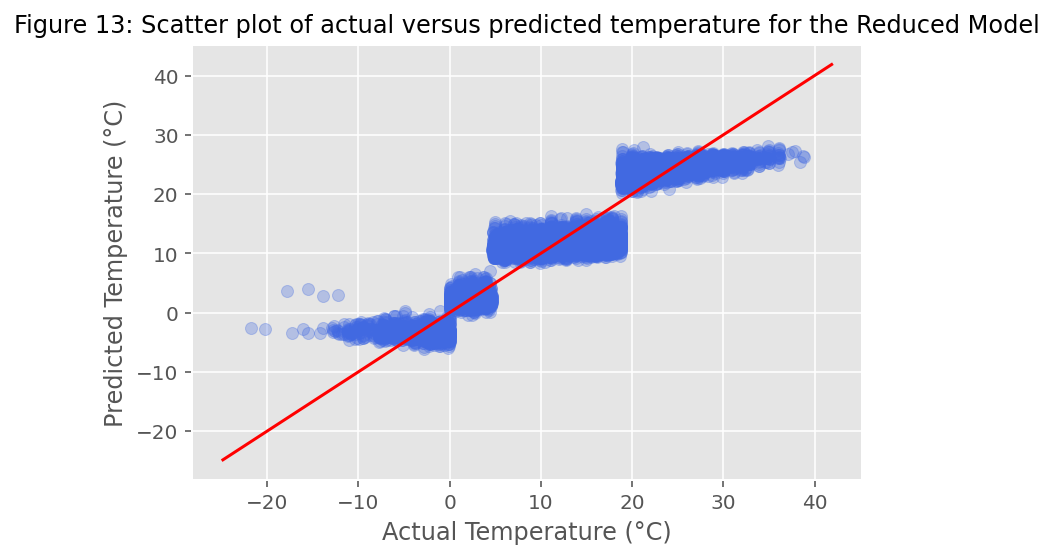

In [31]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin * slope + intercept, xmax * slope + intercept], **kargs)

# Creating scatterplot
plt.scatter(residuals_reduced['Actual'], residuals_reduced['Predicted'], alpha = 0.3, color = "royalblue");
plot_line(axis = plt.gca(), slope = 1, intercept = 0, c = "red");
plt.xlabel('Actual Temperature (°C)');
plt.ylabel('Predicted Temperature (°C)');
plt.title('Figure 13: Scatter plot of actual versus predicted temperature for the Reduced Model', fontsize = 12);
plt.show();

Obtaining from this reduced model, the OLS Regression through backward elimination still produces the same results as the full model with 86.3% of the variance. However, it is less than 1 variable in the full model since the backward elimination supported to remove `Pressure` which is less meaningful to the target `Temperature`. The problem from the full model still remains; hence, we will construct the diagnostic checks on this current model.
### $\color{mediumblue}{\text{4. Reduced Model Diagnostic Checks}}$

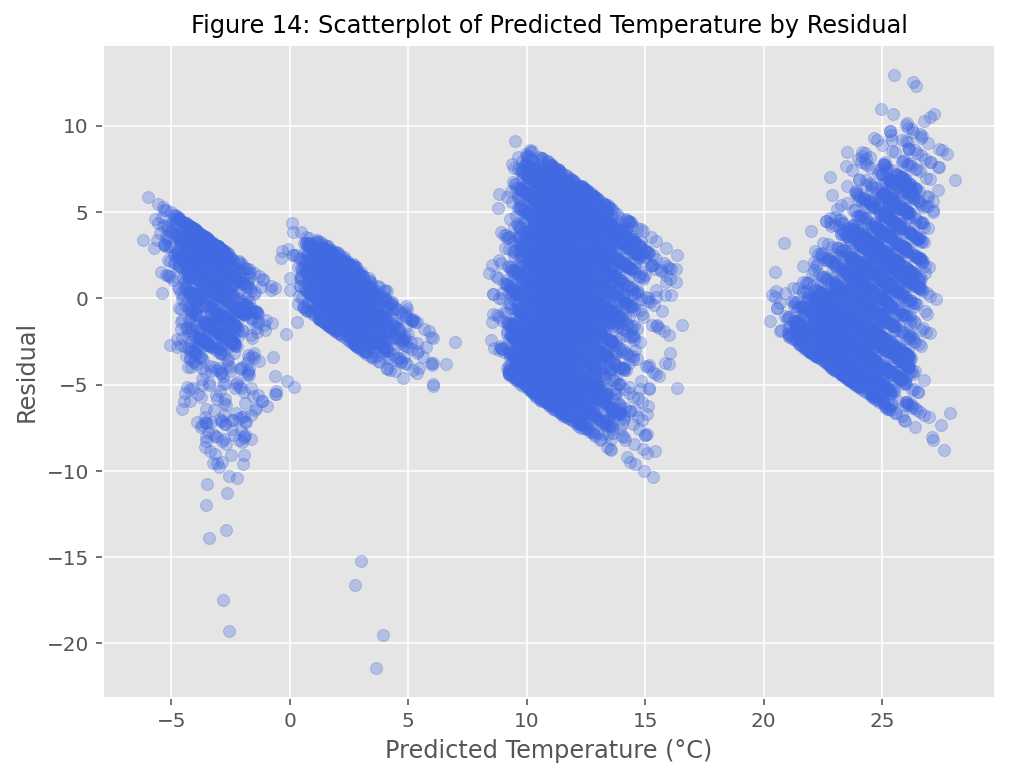

In [32]:
plt.figure(figsize = (8,6))
plt.scatter(residuals_reduced['Predicted'], residuals_reduced['Residual'], alpha = 0.3, color = "royalblue")
plt.title('Figure 14: Scatterplot of Predicted Temperature by Residual', fontsize = 12);
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residual')
plt.show();

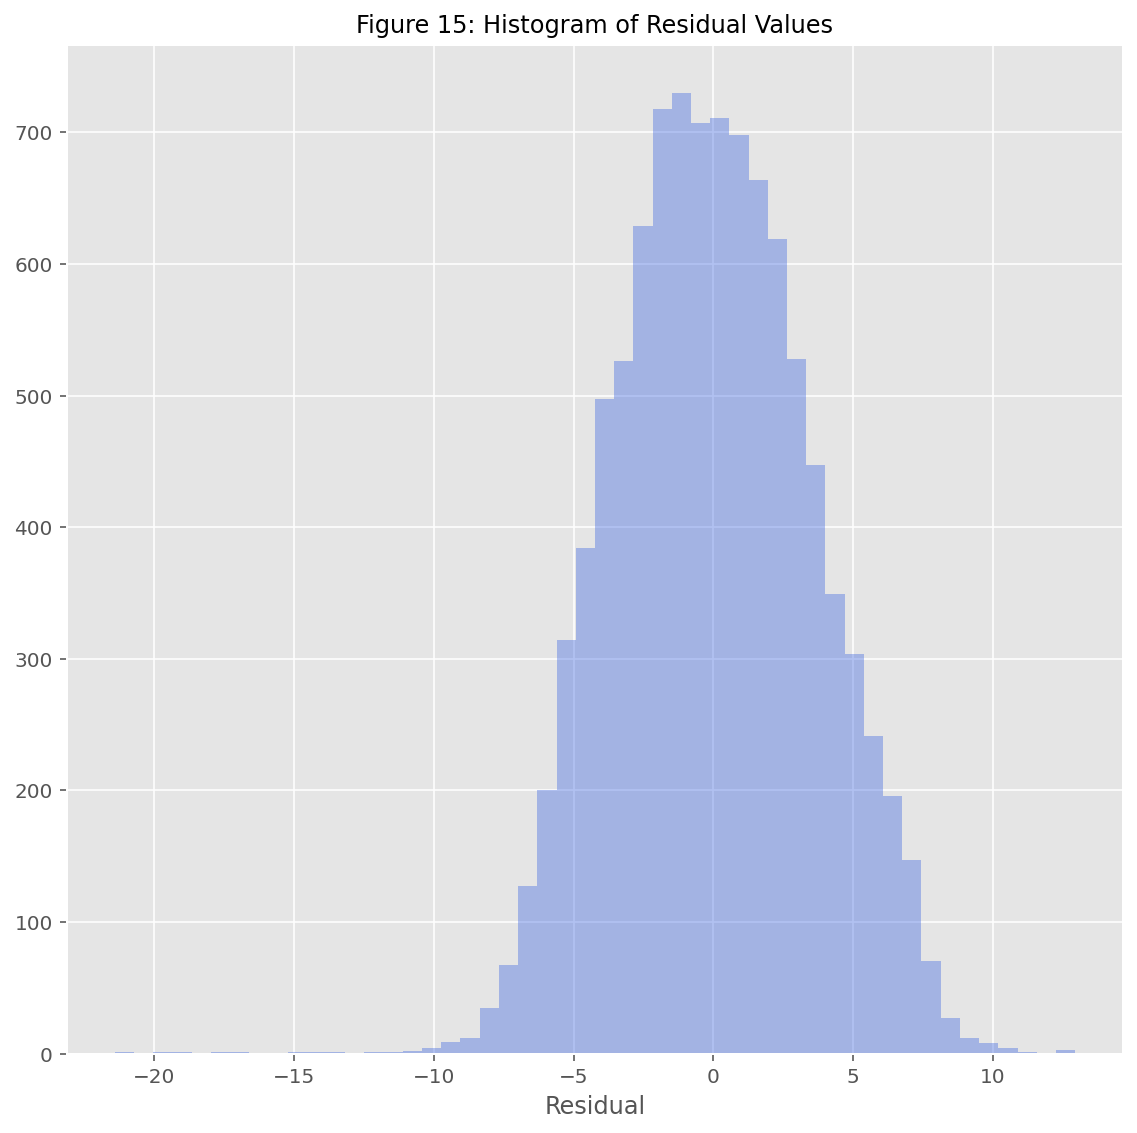

In [33]:
# Get a histogram of Temperature with kernel density estimate
plt.figure(figsize = (8,8))
reduced_residual_histogram = sns.distplot(residuals_reduced['Residual'], kde = False, hist_kws = dict(color = "royalblue"))
plt.title('Figure 15: Histogram of Residual Values', fontsize = 12)
plt.xlabel('Residual')
plt.tight_layout()
plt.show(reduced_residual_histogram);

The 2 figures above are similar to the ones from the full model, observed that the pattern as well as the problem still remains with this reduced model.

## $\color{mediumblue}{\text{VI. Summary and Conclusions}}$ <a name = "Conclusions"></a>
To sum up, we processed the independent variables in order to construct a full model producing the value of the adjusted R-squared at 86.3%. Moreover, after implementing the backward elimination for selecting variable by a cutoff p-value 5%, we can reduce 1 independent variable, nonetheless, keep the same performance. The model with p-value of 0 is finalized to remain only 8 variables. With this prediction, we tends to be successful in predicting the temperature from 0°C to 30°C in general, although it still contains a tremendous margin of error and needs to be processed further. <br><br>
86.3% can be considered as a high value for a multiple linear regression model. To some extent, the variables used are accurate enough for predicting temperature of the weather in term of multiple linear regression framework. What we have done so far could be just a half work for a further research to fully predict the temperature explicitly. It would need some improvement as well as additional methods in order to conduct a better value for Adjusted R-squared.

## $\color{mediumblue}{\text{VII. References}}$ <a name = "References"></a>
- Rehman, Z. (2020). *Weather Data for Linear Regression*. https://www.kaggle.com/zakriarehman/weather-data-for-linear-regression
- Regression Case Study. (2019). *Predicting Age in Census Data*. https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/